In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial import distance
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [4]:
cluster = pd.read_csv("clustering.csv")

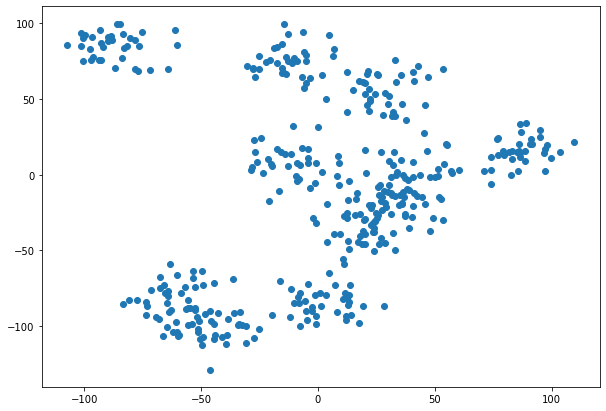

In [10]:
'''
we display the data to see how they decompose,
it's better on the graph because the dataframe doesn't tell much.
'''
plt.figure(figsize=(10,7)) 
keys = cluster.keys()
plt.scatter(cluster[keys[0]], cluster[keys[1]])
plt.show()

In [19]:
'''
in the first attempt I use the elbow method to see what number of clusters will be appropriate
'''
def wcss_score(X, mx):
    scores = []
    for k in range(1, mx+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = -kmeans.score(X)
        scores.append(wcss)
    return scores

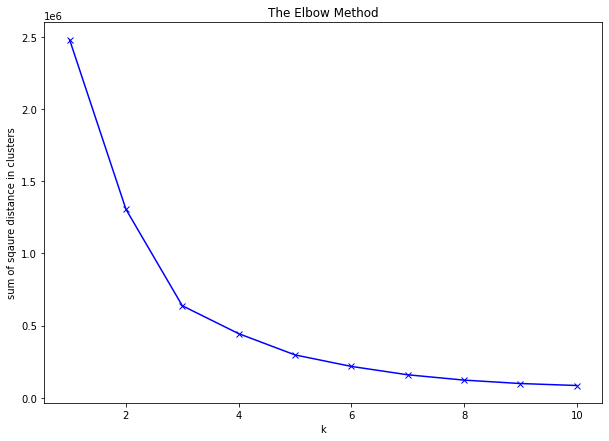

In [24]:
plt.figure(figsize=(10,7))
w = wcss_score(cluster, 10)
x = list(range(1, len(wcss_vec) + 1))
plt.plot(x, w, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of sqaure distance in clusters')
plt.title('The Elbow Method')
plt.show()

You can see that the elbow method does not show much here. In fact, this bend is going from 3 to 9 clusters which is not very helpful. Such a preliminary analysis of the constraints on the previous plot suggests that this one will be a larger number

In [84]:
def plot_clusters(X, n_clusters, method, name):
    plt.figure(figsize=(10,7))
    k = method(n_clusters=n_clusters, random_state=0)
    k.fit(X)
    y = k.predict(X)
    keys = X.keys()
    plt.scatter(X[keys[0]], X[keys[1]], c=y, s=30, cmap='viridis')

    centers = k.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title(name)
    plt.show()

In [51]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

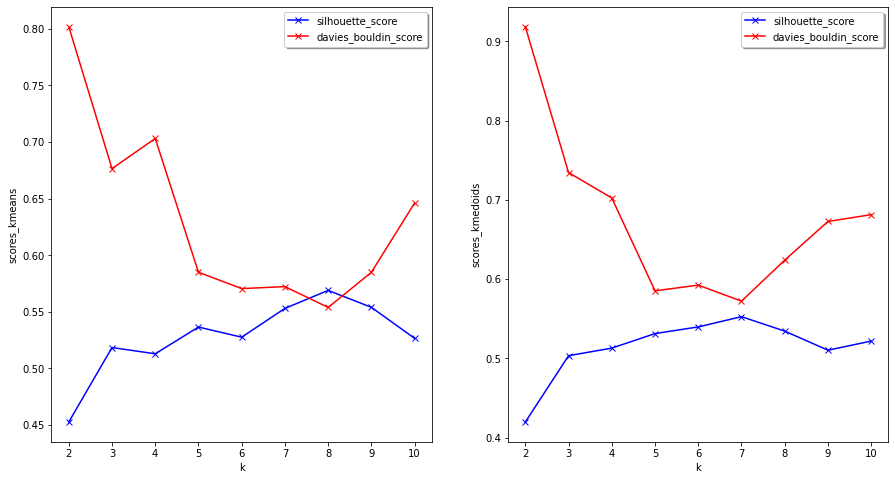

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

cluster_num_seq = range(2, 11) 
silhouette_vec_Kmeans = count_clustering_scores(cluster, cluster_num_seq, KMeans, silhouette_score)
silhouette_vec_Kmedoids = count_clustering_scores(cluster, cluster_num_seq, KMedoids, silhouette_score)
davies_vec_Kmeans = count_clustering_scores(cluster, cluster_num_seq, KMeans, davies_bouldin_score)
davies_vec_Kmedoids = count_clustering_scores(cluster, cluster_num_seq, KMedoids, davies_bouldin_score)

ax1.plot(cluster_num_seq, silhouette_vec_Kmeans, 'bx-')
ax1.plot(cluster_num_seq, davies_vec_Kmeans , 'rx-')
ax1.set_xlabel('k')
ax1.set_ylabel('scores_kmeans')
ax1.legend(('silhouette_score', 'davies_bouldin_score'), loc='upper right', shadow=True)
ax2.plot(cluster_num_seq, silhouette_vec_Kmedoids, 'bx-')
ax2.plot(cluster_num_seq, davies_vec_Kmedoids , 'rx-')
ax2.set_xlabel('k')
ax2.set_ylabel('scores_kmedoids')
ax2.legend(('silhouette_score', 'davies_bouldin_score'), loc='upper right', shadow=True)

plt.show()

I used two metrics and both show the same result for a given model, which confirms me that the choice of such a number of clusters will be appropriate for Kmeans: 8 and for Kmedoids: 7, respectively

We can now visualize it

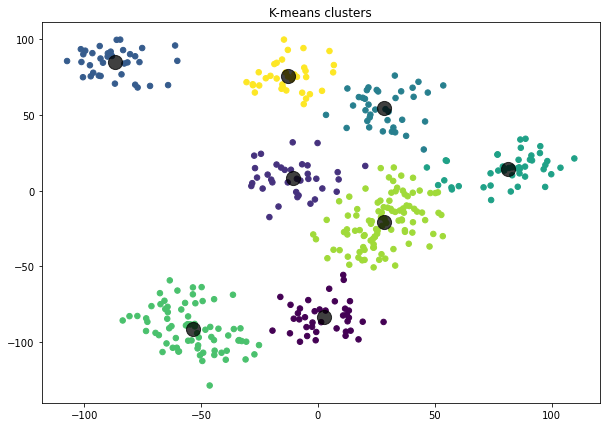

In [85]:
plot_clusters(cluster, 8, KMeans, name = 'K-means clusters')

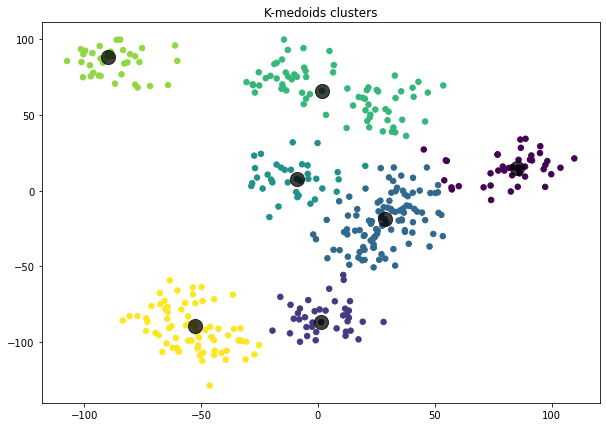

In [88]:
plot_clusters(cluster, 7, KMedoids, name = 'K-medoids clusters')

The conclusion is that both algorithms performed well. The charts show that they classify 6 clusters in the same way. The disputed cluster is the one in the top center. It's hard to say whether kmeans or kmedoids are doing better. For kmedoids it is wider, but its number does not differ from the rest. In kmeans, however, it seems that this division is sensible, but therefore there are fewer points in them